<a href="https://colab.research.google.com/github/CorineAka/Sales_Analysis_Numpy/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\Analyse Exploratoire des Ventes d'une Chaine de vente de produits electroniques

Nous avons dans le dossier datasets/SalesAnalysis des données de ventes d'une entreprise sur l'année 2019. Vous avez un fichier csv pour chaque  mois.

Chaque fichier contient les colonnes suivantes:

OrderID: l'identifiant unique de la commande
Product: La désignation du produit
Quantity Ordered: la quantité vendue
Price each: le prix unitaire
order date : La date d'achat
Purchase adress: l'adresse de la boutique de vente

Nous allons analyser ces données pour répondre aux questions suivantes:

1.   Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?
2.   Dans quelle ville a-t-on le plus vendu de produits ?
3.   A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?
1.  Quel produit a-t-on le plus vendu et pourquoi ?
1.  Quels sont les produits qui sont souvent achetés ensemble ?




 







Impotation des packages et charger le dataset


In [1]:
#importation des packages
#The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, 
#changing and identifying the current directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
#Essayons d'obtenir la donnée pour un mois
avril_sales = pd.read_csv("https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

In [3]:
#avoir un aperçu des 5 premières lignes du dataset
avril_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
#Connaitre les caractéristiques des différentes variables du dataset
avril_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


In [5]:
#Obtenir les différentes colonnes du dataset obtenu
avril_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
#connaître les différents types des variables du dataset
avril_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [7]:
#Regrouper la data de tous les mois de l'année dans un dataset
#Etape 1 : Rappel comment nous avons eu la donnée pour un mois non disponible en local ?
avril_sales = pd.read_csv("https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
# Etape 2 : créer une liste de mois 
months = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
# Etape 3 : créer une liste files contenant tous nos liens pour tous les mois
files = [f"https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_{month}_2019.csv" for month in months]
files

['https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_January_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_February_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_March_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_April_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_May_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_June_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_July_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_August_2019.csv',
 'https://raw.

In [8]:
#Création du dataframe
df = pd.DataFrame()
for lien in files:
  dataframe_intermediate = pd.read_csv(lien)
  df = pd.concat([df, dataframe_intermediate])

In [9]:
#découvrir les 5 premières lignes du dataset
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [10]:
#Connaître la forme de notre dataset
df.shape

(186850, 6)

In [11]:
#Connaitre les caractéristiques des différentes variables du dataset
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [12]:
##connaître les différents types des variables du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


Nettoyer les données


In [13]:
#Vérifier si nous avons des valeurs manquantes
df.isnull().sum(axis=0)#donne la somme des valeurs manquantes par colonne

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [14]:
#Afficher les lignes qui ont au moins des valeurs manquantes dans un dataframe
valeurs_manquantes = df[df.isnull().any(axis=1)]
valeurs_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#est ce que toutes les lignes où nous avons des valeurs manquantes comportent que des valeurs manquantes
valeurs_manquantes.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [16]:
#Supprimer les lignes avec les valeurs manquantes
df1 = df.dropna()
df1.shape

(186305, 6)

In [17]:
#Vérifier que nous n'avons plus de valeurs manquantes
df1.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [18]:
#Vériifions les caractéristiques de notre nouveau dataframe
df1.describe()
#Nous remarquons que certaines variables ont plusieurs valeurs qui sont aberrantes (ex Order ID, top = Order ID au lieu d'un nombre) 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [19]:
#Se débarrer des lignes qui ont des valeurs aberrantes
#Afficher dans un dataframe les lignes où les valeurs de la variable Order Date = Order Date
df1[df1['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [20]:
#Supprimer les lignes 
df2 = df1.drop(df1.loc[df1["Order Date"] == "Order Date", :].index)

In [21]:
#Une vérification des changements effectués
df2.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,182735,182735,182735,182735,182735,182735
unique,175449,19,9,23,140463,138946
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21523,165650,21523,8,9


In [22]:
#Une autre vérification des changements
df2[df2["Order Date"] =="Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Changer le type de certaines variables

In [23]:
df2.info()
#Nous remarquons que toutes les variables sont qualitatives alors que les valeurs prises par ces ces variables sont numériques ou au format date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
dtypes: object(6)
memory usage: 9.8+ MB


In [24]:
#Changement du 'type' des variables
df2['Quantity Ordered'] = df2['Quantity Ordered'].astype('int')
df2['Price Each'] = pd.to_numeric(df2['Price Each'])
df2['Order Date'] = pd.to_datetime(df2['Order Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [25]:
#Vérification des changements 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


Analyse exploratoire

Quel est le meilleur mois de vente ?


In [26]:
#Afficher les 5 premières lignes de notre dataset définitif
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [27]:
df2 = df2.set_index('Order Date')

In [28]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215"
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035"
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016"
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001"
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301"


In [ ]:
#Trier par ordre croissant (heure d'achat) notre dataset
df2.sort_index(inplace = True)

In [29]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215"
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035"
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016"
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001"
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301"


In [30]:
#Création de la variable Month
df2['Month'] = df2.index.month_name()
df2

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",January
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",January
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",January
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",January
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",January
...,...,...,...,...,...,...
2019-12-11 20:58:00,319666,Lightning Charging Cable,1,14.95,"14 Madison St, San Francisco, CA 94016",December
2019-12-01 12:01:00,319667,AA Batteries (4-pack),2,3.84,"549 Willow St, Los Angeles, CA 90001",December
2019-12-09 06:43:00,319668,Vareebadd Phone,1,400.00,"273 Wilson St, Seattle, WA 98101",December


In [31]:
#Créaton de la variable Turnover
df2['turnover'] = df2['Price Each']*df2['Quantity Ordered']
df2.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,turnover
Order Date,,,,,,,
2019-09-29 15:09:00,259162,Lightning Charging Cable,1,14.95,"774 Sunset St, San Francisco, CA 94016",September,14.95
2019-02-21 19:26:00,150508,AA Batteries (4-pack),1,3.84,"622 Center St, San Francisco, CA 94016",February,3.84
2019-06-14 19:45:00,221699,27in FHD Monitor,1,149.99,"603 Elm St, Los Angeles, CA 90001",June,149.99
2019-04-29 07:08:00,189824,Google Phone,1,600.00,"311 Cherry St, Portland, OR 97035",April,600.00
2019-04-29 01:13:00,187639,Macbook Pro Laptop,1,1700.00,"533 Maple St, Boston, MA 02215",April,1700.00


In [32]:
#Calculer le chiffre d'affaire pour chaque mois
df2.groupby("Month")["turnover"].sum()

Month
April        3336376.42
August       2191698.31
December     4557905.42
February     2158127.48
January      1786511.29
July         2587444.91
June         2524464.99
March        2755969.40
May          3101881.04
November     3149785.09
October      3679254.16
September    2050361.26
Name: turnover, dtype: float64

In [33]:
#Trouver le mois où le CA est élevé
df2.groupby("Month")["turnover"].sum().sort_values(ascending = False)
#Le mois avec le CA le plusélevé est le mois de Décembre avec un CA de 4557905.42

Month
December     4557905.42
October      3679254.16
April        3336376.42
November     3149785.09
May          3101881.04
March        2755969.40
July         2587444.91
June         2524464.99
August       2191698.31
February     2158127.48
September    2050361.26
January      1786511.29
Name: turnover, dtype: float64

Text(0.5, 1.0, 'CA global par mois')

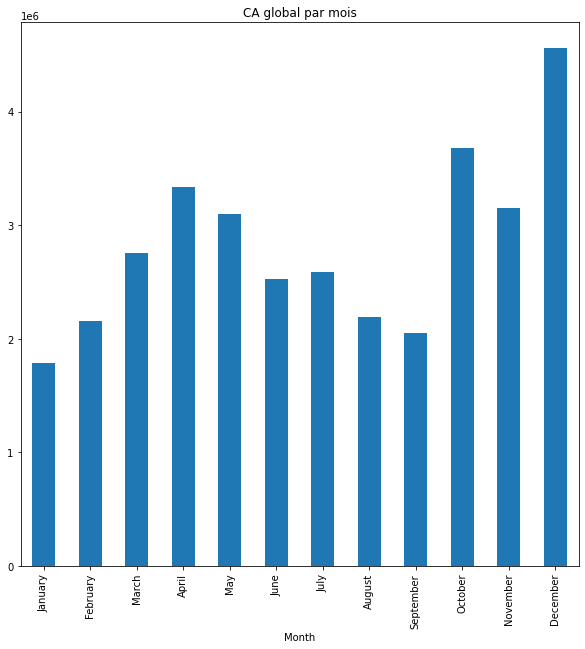

In [34]:
#Représentation graphique du Ca en fonction des mois
months= ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
df2.groupby("Month")["turnover"].sum().loc[months]
df2.groupby("Month")["turnover"].sum().loc[months].plot.bar(figsize = (10,10))
plt.title("CA global par mois")

Dans quelle ville a-t-on le plus vendu de produits ?


In [35]:
#Ici on va s'intéresser aux valeurs uniques de la varaible Purchase adresse
df2['Purchase Address'].unique()

array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016', ...,
       '273 Wilson St, Seattle, WA 98101',
       '778 River St, Dallas, TX 75001',
       '747 Chestnut St, Los Angeles, CA 90001'], dtype=object)

In [36]:
#Création d'une fonction pour récupérer le nom de la ville
def get_ville(adress):
  return adress.split(",")[1].strip()
#La méthode strip permet d'enlever les espaces de part et d'autre d'une string


In [37]:
#test
get_ville ('9 Lake St, New York City, NY 10001')

'New York City'

In [38]:
#Création de la variable ville
df2['Ville']= df2['Purchase Address'].apply(get_ville)
df2.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,turnover,Ville
Order Date,,,,,,,,
2019-03-10 00:25:00,169118,Apple Airpods Headphones,1,150.00,"445 West St, Los Angeles, CA 90001",March,150.00,Los Angeles
2019-04-12 17:46:00,176778,34in Ultrawide Monitor,1,379.99,"201 Madison St, San Francisco, CA 94016",April,379.99,San Francisco
2019-10-30 11:04:00,261193,Apple Airpods Headphones,1,150.00,"620 Washington St, Austin, TX 73301",October,150.00,Austin
2019-06-21 12:59:00,219579,34in Ultrawide Monitor,1,379.99,"507 5th St, Atlanta, GA 30301",June,379.99,Atlanta
2019-10-24 11:41:00,267486,AA Batteries (4-pack),1,3.84,"964 Washington St, San Francisco, CA 94016",October,3.84,San Francisco


In [39]:
#Quel est la ville où nous avons le plus de CA
df2.groupby("Ville")["turnover"].sum().sort_values(ascending = False)
#La ville qui a le plus grand CA est San Francisco avec 8124120.94

Ville
San Francisco    8124120.94
Los Angeles      5354039.93
New York City    4581658.91
Boston           3604080.86
Atlanta          2741642.05
Dallas           2717793.72
Seattle          2693048.60
Portland         2276649.24
Austin           1786745.52
Name: turnover, dtype: float64

Text(0.5, 1.0, 'CA par ville ')

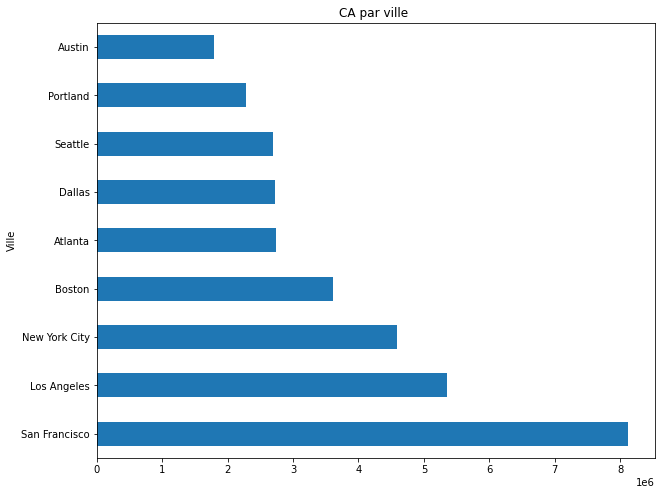

In [41]:
#Visualisation
df2.groupby("Ville")["turnover"].sum().sort_values(ascending = False).plot.barh(figsize = (10,8))
plt.title("CA par ville ")

A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?
A quelle heure on vend le plus ?

In [42]:
#Création des variables 
df2["hour"] = df2.index.hour
df2["time"] = df2.index.time
df2.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,turnover,Ville,hour,time
Order Date,,,,,,,,,,
2019-02-21 03:38:00,161402,Macbook Pro Laptop,1,1700.00,"607 8th St, San Francisco, CA 94016",February,1700.00,San Francisco,3,03:38:00
2019-05-15 20:03:00,208155,AAA Batteries (4-pack),2,2.99,"235 Center St, San Francisco, CA 94016",May,5.98,San Francisco,20,20:03:00
2019-10-27 18:29:00,271404,27in 4K Gaming Monitor,1,389.99,"972 2nd St, Los Angeles, CA 90001",October,389.99,Los Angeles,18,18:29:00
2019-06-20 21:48:00,222206,AA Batteries (4-pack),1,3.84,"190 Johnson St, San Francisco, CA 94016",June,3.84,San Francisco,21,21:48:00
2019-04-29 19:33:00,190120,AA Batteries (4-pack),1,3.84,"100 12th St, Seattle, WA 98101",April,3.84,Seattle,19,19:33:00


In [43]:
df2.groupby('hour')['turnover'].sum().sort_values(ascending= False)

hour
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: turnover, dtype: float64

In [44]:
#Autre méthode
ca_par_heure = pd.DataFrame(df2.groupby('hour')['turnover'].sum())
ca_par_heure

,turnover
hour,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


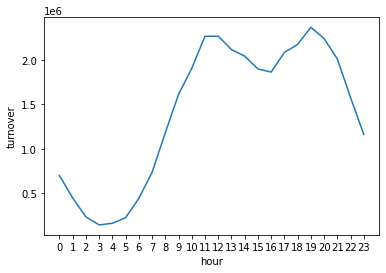

In [45]:
sns.lineplot(data=ca_par_heure['turnover'])
plt.xticks(ticks=range(0, 24))
plt.show()

In [46]:
#Conclusion
#Les ventes sont élévées entre 11h et 12h etentre 19h et 20h

Le produit le plus vendu en volume

In [47]:
df2.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int64

Le produit le plus vendu en valeur

In [48]:
df2.groupby('Product')['turnover'].sum().sort_values(ascending=False)

Product
Macbook Pro Laptop            7896500.00
iPhone                        4712400.00
ThinkPad Laptop               4053959.46
Google Phone                  3264000.00
27in 4K Gaming Monitor        2392198.66
34in Ultrawide Monitor        2308819.24
Apple Airpods Headphones      2307450.00
Flatscreen TV                 1417200.00
Bose SoundSport Headphones    1323467.64
27in FHD Monitor              1114275.71
Vareebadd Phone                809200.00
20in Monitor                   446339.42
LG Washing Machine             389400.00
LG Dryer                       384000.00
Lightning Charging Cable       341472.95
USB-C Charging Cable           281482.25
Wired Headphones               242209.99
AA Batteries (4-pack)          104248.32
AAA Batteries (4-pack)          91156.13
Name: turnover, dtype: float64

Quels sont les produits qui sont souvent achetés ensemble ?

In [49]:
#les produits achetés ensemble ont des Order ID identiques
#Nous allons afficher les produits avec produits avec le même Order ID
df2[df2["Order ID"].duplicated(keep= False)]

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,turnover,Ville,hour,time
Order Date,,,,,,,,,,
2019-01-07 16:06:00,141275,USB-C Charging Cable,1,11.95,"610 Walnut St, Austin, TX 73301",January,11.95,Austin,16,16:06:00
2019-01-07 16:06:00,141275,Wired Headphones,1,11.99,"610 Walnut St, Austin, TX 73301",January,11.99,Austin,16,16:06:00
2019-01-02 08:25:00,141290,Apple Airpods Headphones,1,150.00,"4 1st St, Los Angeles, CA 90001",January,150.00,Los Angeles,8,08:25:00
2019-01-02 08:25:00,141290,AA Batteries (4-pack),3,3.84,"4 1st St, Los Angeles, CA 90001",January,11.52,Los Angeles,8,08:25:00
2019-01-10 11:19:00,141365,Vareebadd Phone,1,400.00,"20 Dogwood St, New York City, NY 10001",January,400.00,New York City,11,11:19:00
...,...,...,...,...,...,...,...,...,...,...
2019-12-11 00:30:00,319584,Wired Headphones,1,11.99,"537 Sunset St, Portland, OR 97035",December,11.99,Portland,0,00:30:00
2019-12-01 08:44:00,319596,iPhone,1,700.00,"436 14th St, New York City, NY 10001",December,700.00,New York City,8,08:44:00
2019-12-01 08:44:00,319596,Lightning Charging Cable,1,14.95,"436 14th St, New York City, NY 10001",December,14.95,New York City,8,08:44:00


In [50]:
#Créeons un nouveau dataframe avec ces nouvelles données
df3 = df2[df2["Order ID"].duplicated(keep= False)].copy()
df3


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,turnover,Ville,hour,time
Order Date,,,,,,,,,,
2019-01-07 16:06:00,141275,USB-C Charging Cable,1,11.95,"610 Walnut St, Austin, TX 73301",January,11.95,Austin,16,16:06:00
2019-01-07 16:06:00,141275,Wired Headphones,1,11.99,"610 Walnut St, Austin, TX 73301",January,11.99,Austin,16,16:06:00
2019-01-02 08:25:00,141290,Apple Airpods Headphones,1,150.00,"4 1st St, Los Angeles, CA 90001",January,150.00,Los Angeles,8,08:25:00
2019-01-02 08:25:00,141290,AA Batteries (4-pack),3,3.84,"4 1st St, Los Angeles, CA 90001",January,11.52,Los Angeles,8,08:25:00
2019-01-10 11:19:00,141365,Vareebadd Phone,1,400.00,"20 Dogwood St, New York City, NY 10001",January,400.00,New York City,11,11:19:00
...,...,...,...,...,...,...,...,...,...,...
2019-12-11 00:30:00,319584,Wired Headphones,1,11.99,"537 Sunset St, Portland, OR 97035",December,11.99,Portland,0,00:30:00
2019-12-01 08:44:00,319596,iPhone,1,700.00,"436 14th St, New York City, NY 10001",December,700.00,New York City,8,08:44:00
2019-12-01 08:44:00,319596,Lightning Charging Cable,1,14.95,"436 14th St, New York City, NY 10001",December,14.95,New York City,8,08:44:00


In [51]:
#Créer les couples de produits achetés ensemble
def ensemble_produits_par_Order_ID(p: list):
  return ";".join(p)

In [52]:
#test de la fonction
ensemble_produits_par_Order_ID(["Bose SoundSport Headphones", "Lightning Charging Cable"])

'Bose SoundSport Headphones;Lightning Charging Cable'

In [53]:
#afficher les produits vendus ensemble par ID
df3.groupby('Order ID')['Product'].apply(ensemble_produits_par_Order_ID)

Order ID
141275              USB-C Charging Cable;Wired Headphones
141290     Apple Airpods Headphones;AA Batteries (4-pack)
141365                   Vareebadd Phone;Wired Headphones
141384                  Google Phone;USB-C Charging Cable
141450            Google Phone;Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop;Wired Headphones
319556                      Google Phone;Wired Headphones
319584                            iPhone;Wired Headphones
319596                    iPhone;Lightning Charging Cable
319631    34in Ultrawide Monitor;Lightning Charging Cable
Name: Product, Length: 6928, dtype: object

In [54]:
#créer la variable ensemble produits
ensemble_produits = df3.groupby('Order ID')['Product'].apply(ensemble_produits_par_Order_ID)

In [55]:
#Importation des pakages qui vont nous aider à compter les itérations par combinaisons de produits
from itertools import combinations
from collections import Counter


In [56]:
#test pour savoir compter les éléments d'une liste deux à deux
Counter(combinations(['a', 'c', 'b'], 2))

Counter({('a', 'b'): 1, ('a', 'c'): 1, ('c', 'b'): 1})

In [57]:
#test pour connaître les éléments liés deux à deux dans une combinaison
for i,j in combinations(['a', 'c', 'b'], 2):
  print (i,j)

a c
a b
c b


In [58]:
#Création d'une liste comprenant tous nos produits vendus deux à deux
liste_produits = ensemble_produits.to_list()
liste_produits

['USB-C Charging Cable;Wired Headphones',
 'Apple Airpods Headphones;AA Batteries (4-pack)',
 'Vareebadd Phone;Wired Headphones',
 'Google Phone;USB-C Charging Cable',
 'Google Phone;Bose SoundSport Headphones',
 'iPhone;Apple Airpods Headphones',
 'Google Phone;Apple Airpods Headphones',
 'iPhone;Apple Airpods Headphones;Wired Headphones',
 'USB-C Charging Cable;Apple Airpods Headphones',
 'Lightning Charging Cable;Wired Headphones',
 'iPhone;Lightning Charging Cable',
 '27in FHD Monitor;Bose SoundSport Headphones',
 'Google Phone;USB-C Charging Cable',
 'iPhone;Wired Headphones',
 'Google Phone;USB-C Charging Cable',
 'AA Batteries (4-pack);AAA Batteries (4-pack)',
 'Vareebadd Phone;USB-C Charging Cable;Wired Headphones',
 'Google Phone;USB-C Charging Cable',
 'Vareebadd Phone;Wired Headphones',
 '34in Ultrawide Monitor;Lightning Charging Cable',
 'USB-C Charging Cable;Wired Headphones',
 'Lightning Charging Cable;Bose SoundSport Headphones',
 'Google Phone;Wired Headphones',
 'iPhon

In [59]:
#Décompte des occcurences de combinaisons de produits
count = Counter()
for achat in liste_produits:
    products = achat.split(';')
    print(products)
    

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
['iPhone', 'Wired Headphones']
['Apple Airpods Headphones', 'Lightning Charging Cable']
['AA Batteries (4-pack)', '27in 4K Gaming Monitor']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'AAA Batteries (4-pack)']
['AA Batteries (4-pack)', 'iPhone']
['iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones']
['iPhone', 'Bose SoundSport Headphones']
['Lightning Charging Cable', 'Lightning Charging Cable']
['AA Batteries (4-pack)', 'USB-C Charging Cable']
['iPhone', 'Lightning Charging Cable']
['Apple Airpods Headphones', 'Bose SoundSport Headphones']
['Flatscreen TV', 'Wired Headphones']
['Vareebadd Phone', 'USB-C Charging Cable']
['USB-C Charging Cable', '34in Ultrawide Monitor']
['iPhone', 'Apple Airpods Headphones']
['Google Phone', 'Bose SoundSport Headphones']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['20in Monitor', 'USB-C Charging Cable']
['Flatscr

In [60]:
for achat in liste_produits:
  products = achat.split(';')
  count.update(Counter(combinations(products, 2)))


In [61]:
count

Counter({('20in Monitor', '20in Monitor'): 3,
         ('20in Monitor', '27in FHD Monitor'): 1,
         ('20in Monitor', '34in Ultrawide Monitor'): 1,
         ('20in Monitor', 'AA Batteries (4-pack)'): 5,
         ('20in Monitor', 'AAA Batteries (4-pack)'): 3,
         ('20in Monitor', 'Apple Airpods Headphones'): 6,
         ('20in Monitor', 'Bose SoundSport Headphones'): 9,
         ('20in Monitor', 'Flatscreen TV'): 1,
         ('20in Monitor', 'Google Phone'): 2,
         ('20in Monitor', 'LG Washing Machine'): 1,
         ('20in Monitor', 'Lightning Charging Cable'): 9,
         ('20in Monitor', 'Macbook Pro Laptop'): 4,
         ('20in Monitor', 'ThinkPad Laptop'): 2,
         ('20in Monitor', 'USB-C Charging Cable'): 15,
         ('20in Monitor', 'Wired Headphones'): 12,
         ('20in Monitor', 'iPhone'): 1,
         ('27in 4K Gaming Monitor', '20in Monitor'): 2,
         ('27in 4K Gaming Monitor', '27in 4K Gaming Monitor'): 5,
         ('27in 4K Gaming Monitor', '27in FHD M

In [62]:
#Les combinaisons de poduits les plus courantes
count.most_common(1)

[(('iPhone', 'Lightning Charging Cable'), 973)]

In [63]:
#Les 10 combinaisons les plus communes 
for ensemble, c in count.most_common(10):
    print(ensemble, c)

('iPhone', 'Lightning Charging Cable') 973
('Google Phone', 'USB-C Charging Cable') 954
('iPhone', 'Wired Headphones') 437
('Google Phone', 'Wired Headphones') 401
('Vareebadd Phone', 'USB-C Charging Cable') 348
('iPhone', 'Apple Airpods Headphones') 343
('Google Phone', 'Bose SoundSport Headphones') 219
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 141
('Lightning Charging Cable', 'Wired Headphones') 92
